<a href="https://colab.research.google.com/github/SafiullinFanil/lab-3/blob/main/lab3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [ ]:
plt.rcParams['figure.figsize'] = (11, 6.5)

In [ ]:
import pandas as pd
from sklearn.datasets import load_boston

In [ ]:
data = pd.read_csv("1_breast_cancer.csv")

In [ ]:
data.keys()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
data = data.drop('id', axis = 1) 
data = data.drop('Unnamed: 32', axis = 1) 

In [ ]:
X = data
X.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X.shape

(569, 31)

In [ ]:
y = data['diagnosis'] 
y[:5]

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [ ]:
y.shape

(569,)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 31), (143, 31), (426,), (143,))

## Решающее дерево своими руками

In [ ]:
def H(R):
    eps = 1e-10

    M_ratio = np.sum(R['diagnosis'] == 'M')/len(R['diagnosis'])
    B_ratio = np.sum(R['diagnosis'] == 'B')/len(R['diagnosis'])

    h = -(M_ratio*np.log(M_ratio + eps) + B_ratio*np.log(B_ratio + eps))

    return h


def split_node(R_m, feature, t):
    left = R_m[feature] < t
    right = R_m[feature] >= t

    R_left = R_m[left]
    R_right = R_m[right]
    return R_left, R_right


def q_error(R_m, feature, t):
    left = R_m[feature] < t
    right = R_m[feature] >= t
    left_q = np.sum(R_m[feature][left]) * H(R_m[left]) if np.sum(R_m[feature][left]) > 0 else 0
    right_q = np.sum(R_m[feature][right]) * H(R_m[right]) if np.sum(R_m[feature][right]) > 0 else 0
    q = left_q + right_q
    q /= len(R_m[feature])
    return q


_Переберите все возможные разбиения выборки по одному из признаков и постройте график критерия ошибки в зависимости от значения порога._

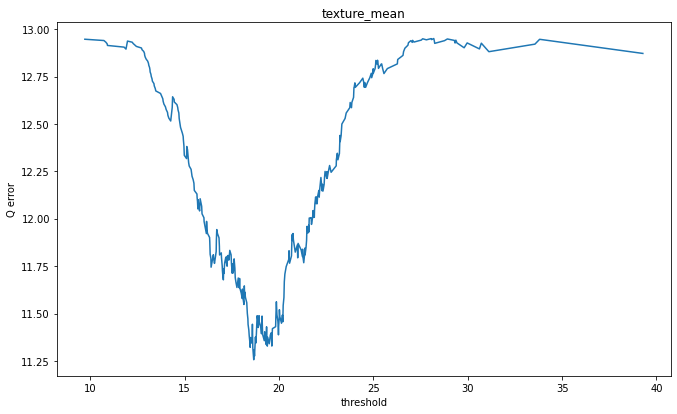

In [ ]:
feature = 'texture_mean'
Q_array = []
feature_values = np.unique(X_train[feature])
for t in feature_values:
    Q_array.append(q_error(X_train, feature, t))
plt.plot(feature_values, Q_array)
plt.title(feature)
plt.xlabel('threshold')
plt.ylabel('Q error')
plt.show()

_Напишите функцию, находящую оптимальное разбиение данной вершины по данному признаку._

In [ ]:
def get_optimal_split(R_m, feature):
    Q_array = []
    feature_values = np.unique(R_m[feature])
    for t in feature_values:
        Q_array.append(q_error(R_m, feature, t))
    Q_array = np.asarray(Q_array)
    opt_threshold = feature_values[Q_array.argmin()]
    return opt_threshold, Q_array

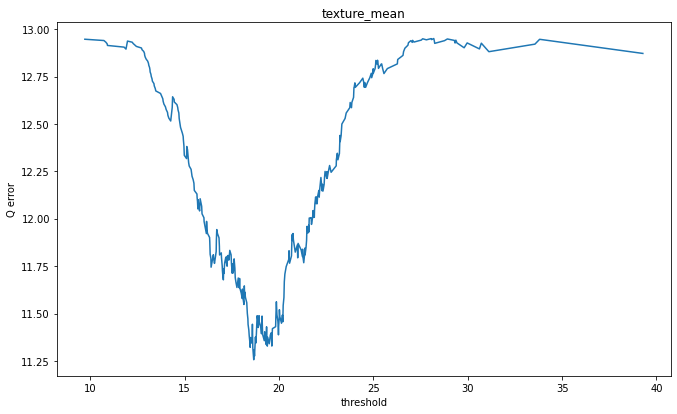

In [ ]:
t, Q_array = get_optimal_split(X_train, feature)
plt.plot(np.unique(X_train[feature]), Q_array)
plt.title(feature)
plt.xlabel('threshold')
plt.ylabel('Q error')
plt.show()

_Постройте графики критерия ошибки (в зависимости от количества объектов в левом поддереве) для каждого из признаков. Найдите признак, показывающий наилучшее качество. Какой это признак? Каков порог разбиения и значение качества? Постройте график критерия ошибки для данного признака в зависимости от значения порога._

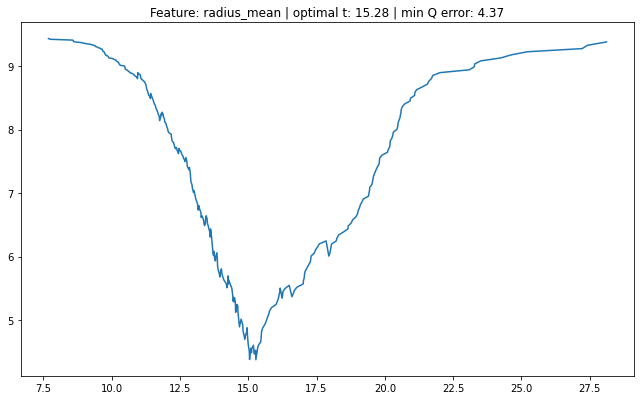

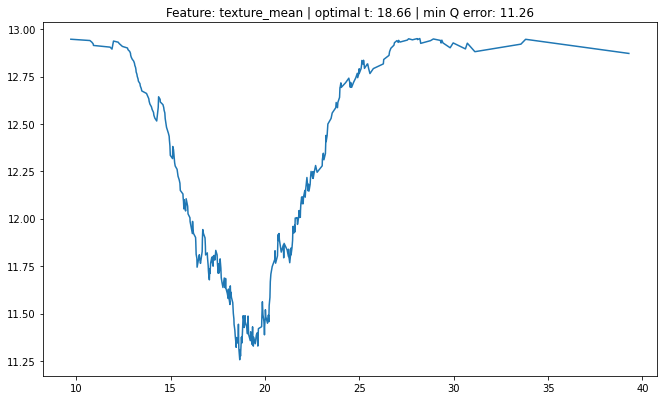

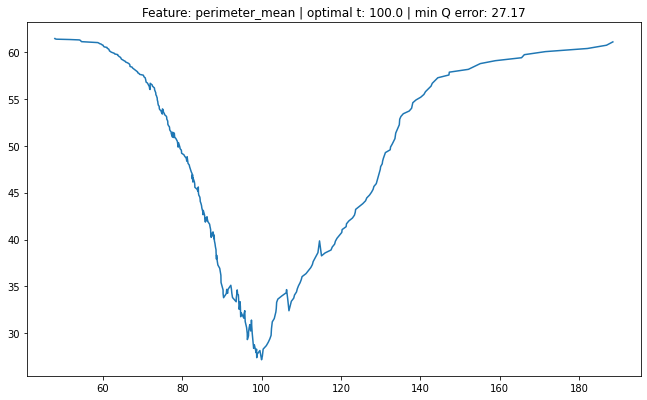

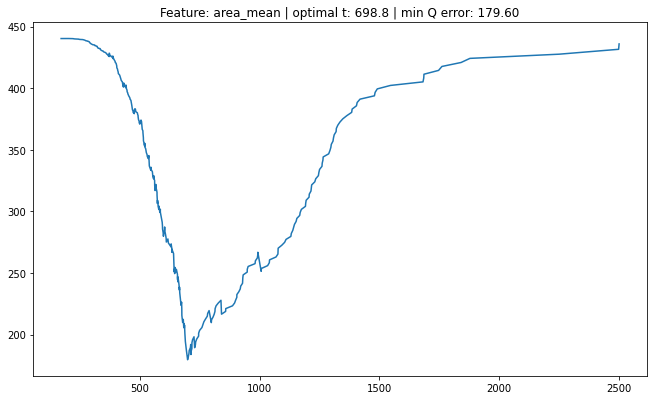

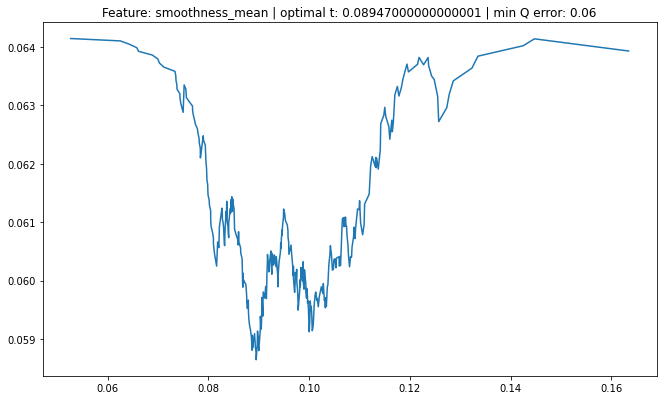

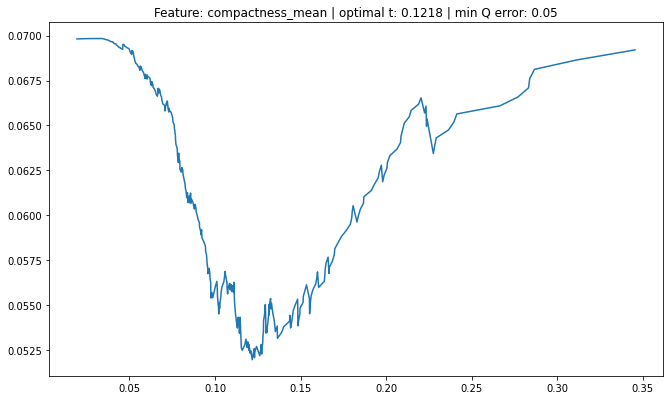

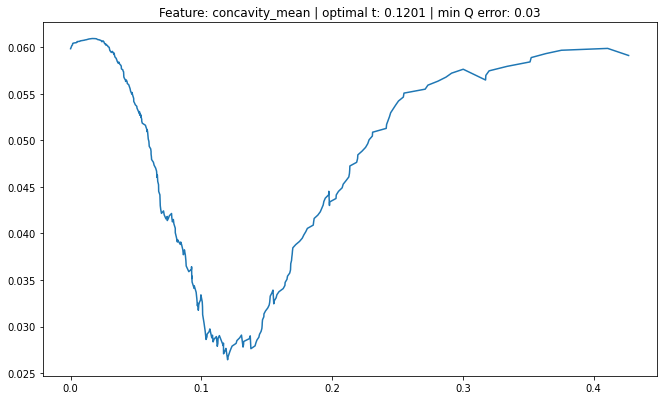

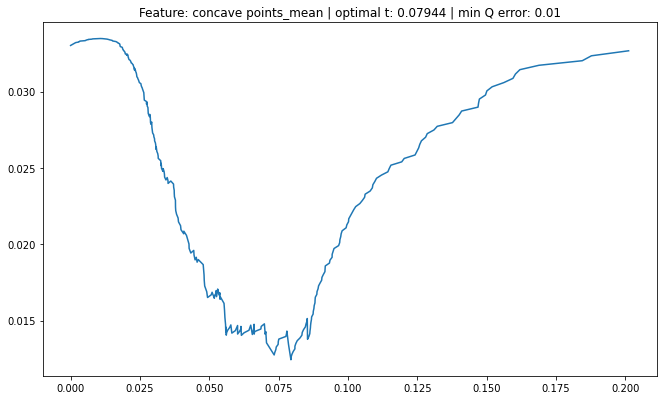

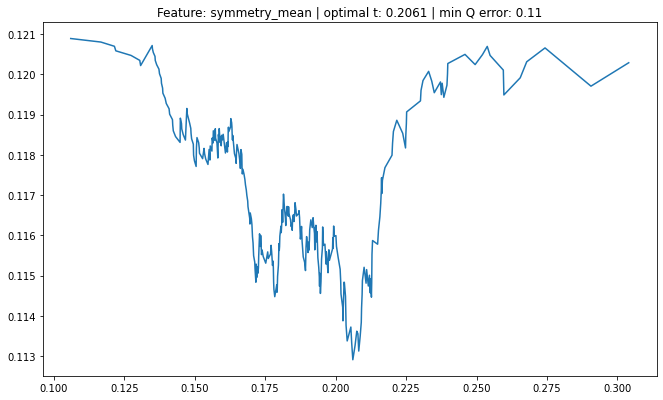

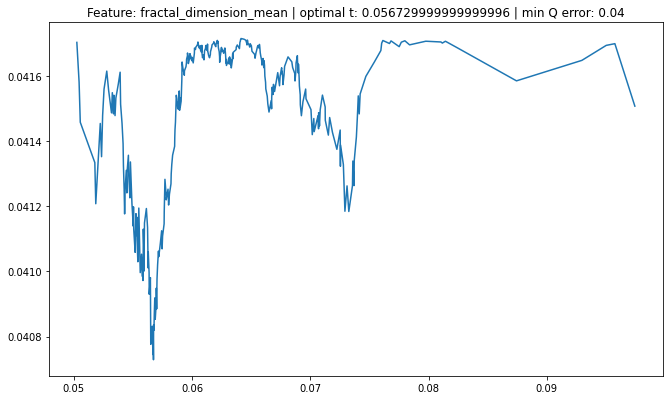

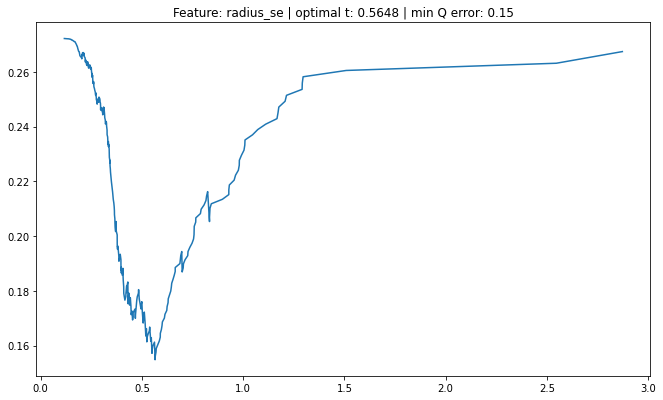

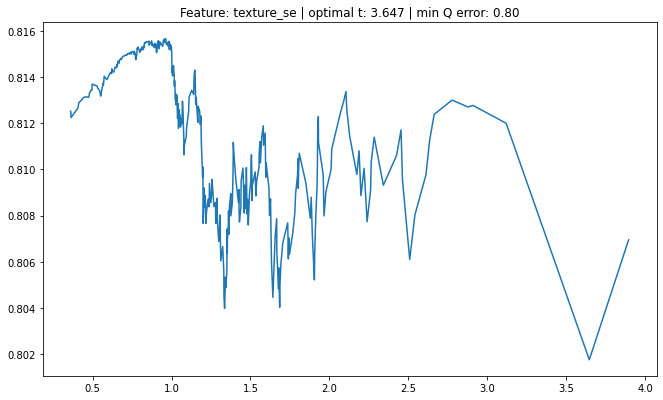

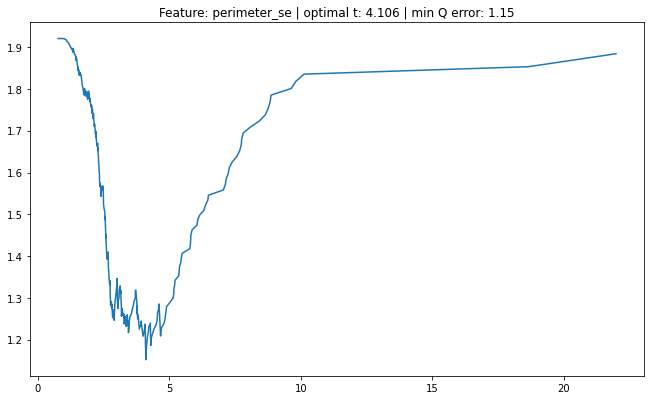

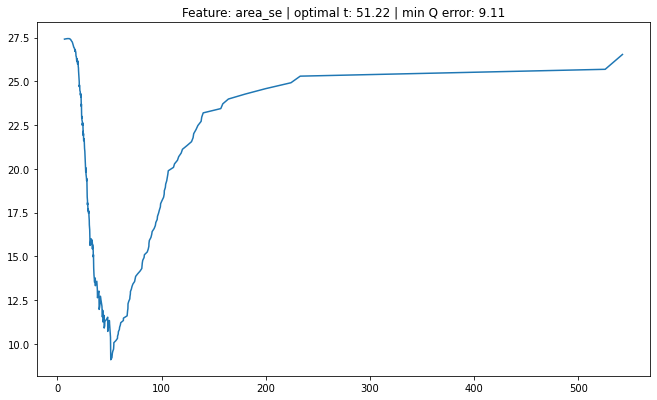

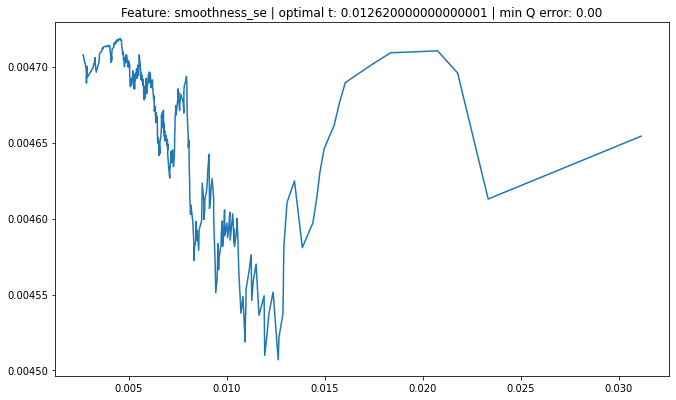

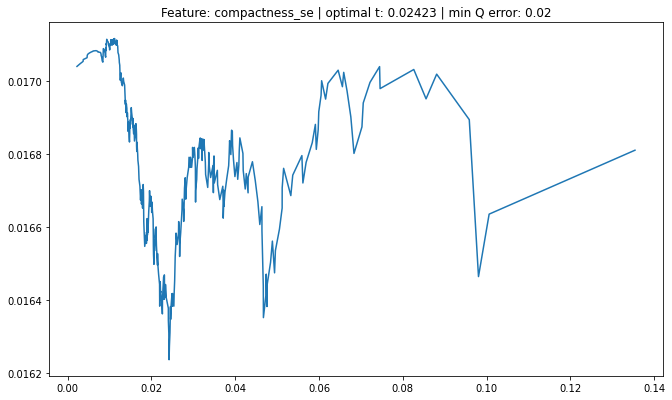

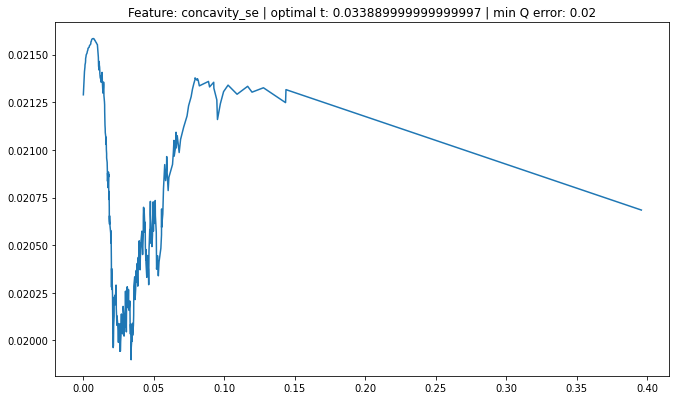

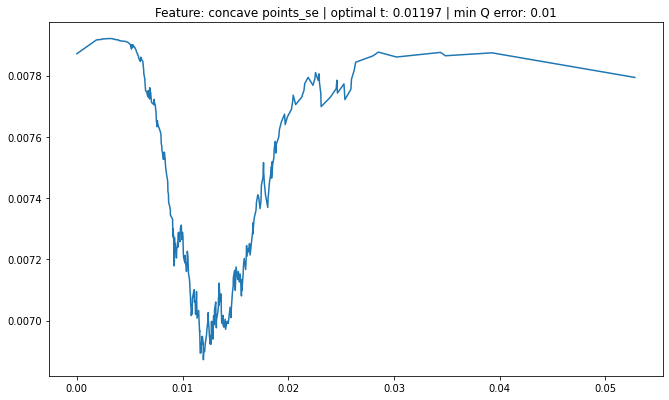

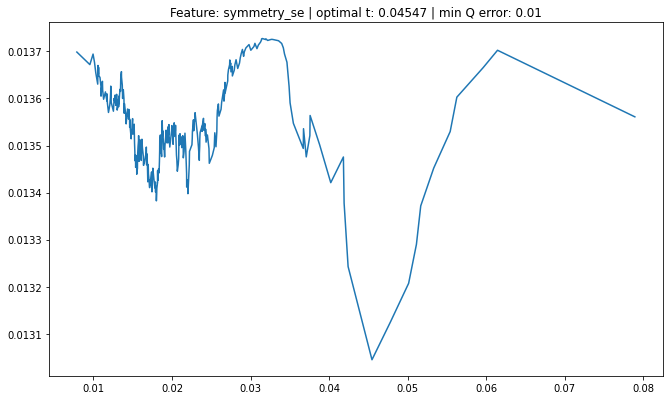

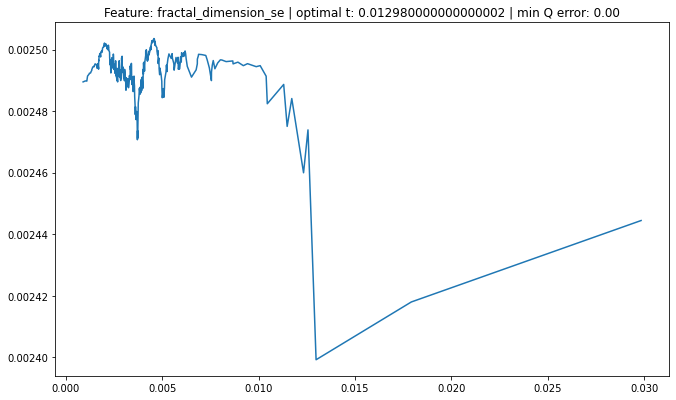

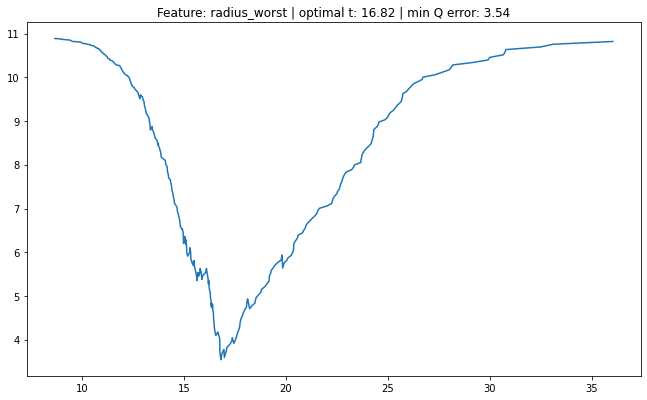

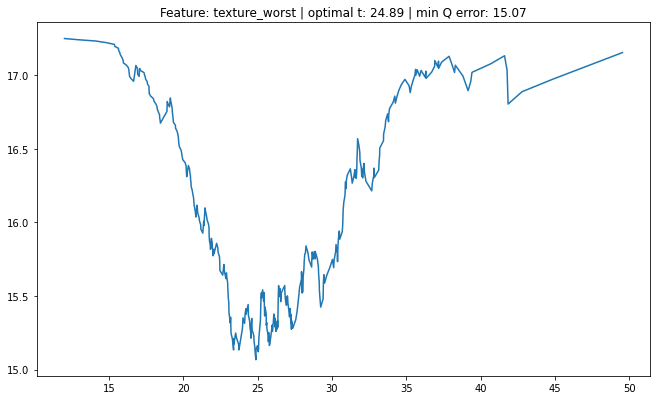

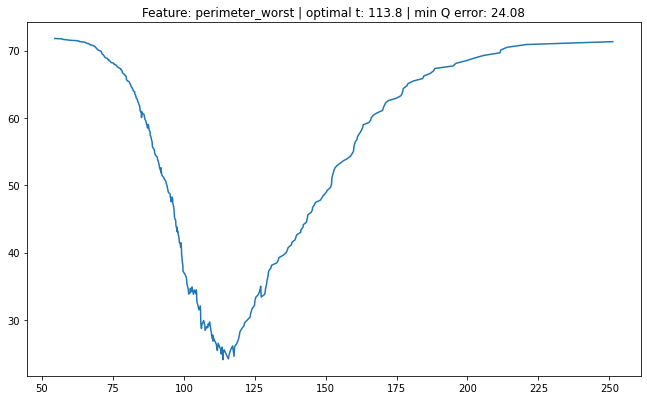

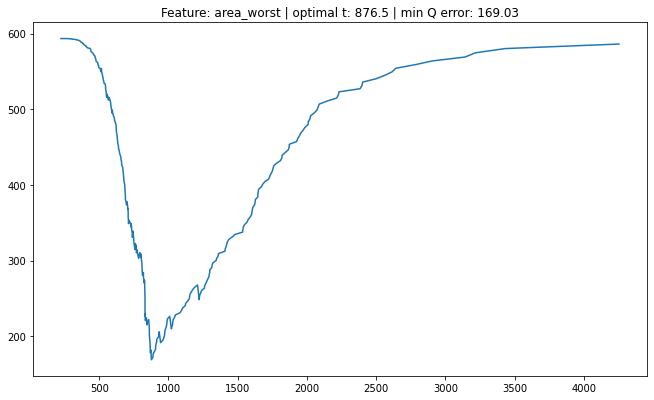

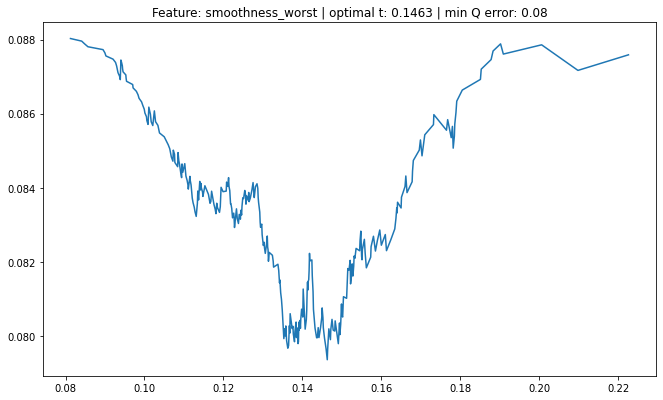

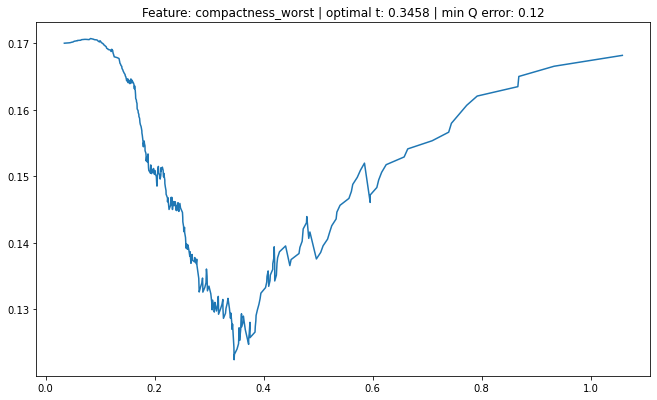

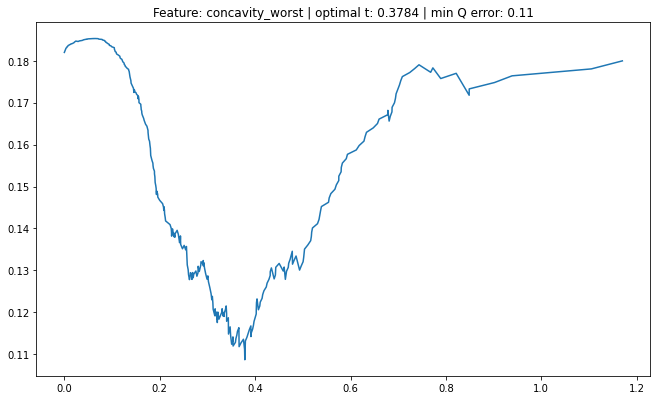

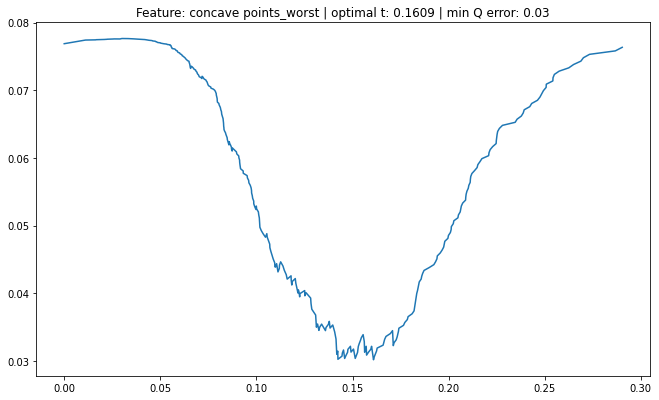

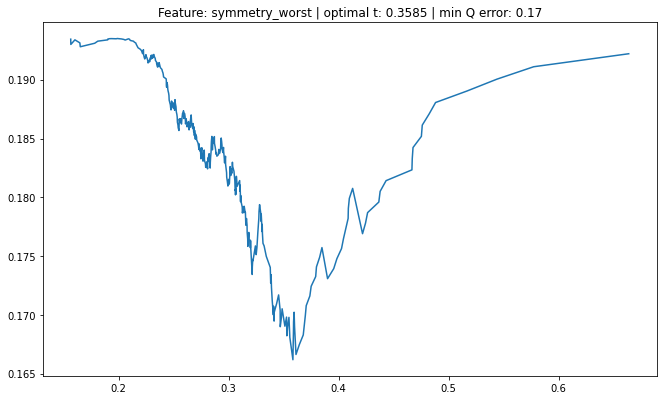

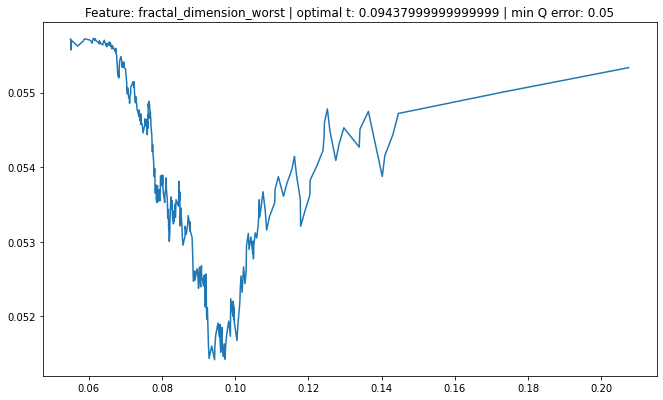

In [ ]:
results = []

columns = X_train.columns
columns = columns.drop('diagnosis')

for f in columns:
    t, Q_array = get_optimal_split(X_train, f)
    min_error = min(Q_array)
    results.append((f, t, min_error))
    plt.figure()
    plt.title('Feature: {} | optimal t: {} | min Q error: {:.2f}'.format(f, t, min_error))
    plt.plot(np.unique(X_train[f]), Q_array)
    plt.show()

In [ ]:
results = sorted(results, key=lambda x: x[2])
results

[('fractal_dimension_se', 0.012980000000000002, 0.002399234667331536),
 ('smoothness_se', 0.012620000000000001, 0.004507059250462884),
 ('concave points_se', 0.01197, 0.006872297581628539),
 ('concave points_mean', 0.07944, 0.012447460792042661),
 ('symmetry_se', 0.04547, 0.013045166152464795),
 ('compactness_se', 0.02423, 0.016237574280344426),
 ('concavity_se', 0.033889999999999997, 0.01989848868443876),
 ('concavity_mean', 0.1201, 0.026439646962118896),
 ('concave points_worst', 0.1609, 0.030209768498671446),
 ('fractal_dimension_mean', 0.056729999999999996, 0.04072879197003941),
 ('fractal_dimension_worst', 0.09437999999999999, 0.051419269071208945),
 ('compactness_mean', 0.1218, 0.05196270570150083),
 ('smoothness_mean', 0.08947000000000001, 0.05864420143801076),
 ('smoothness_worst', 0.1463, 0.07935733020713867),
 ('concavity_worst', 0.3784, 0.10867123071702041),
 ('symmetry_mean', 0.2061, 0.11291193016899626),
 ('compactness_worst', 0.3458, 0.12244856357929262),
 ('radius_se', 0

In [ ]:
pd.DataFrame(results, columns=['feature', 'optimal t', 'min Q error'])

,feature,optimal t,min Q error
0,fractal_dimension_se,0.01298,0.002399
1,smoothness_se,0.01262,0.004507
2,concave points_se,0.01197,0.006872
3,concave points_mean,0.07944,0.012447
4,symmetry_se,0.04547,0.013045
5,compactness_se,0.02423,0.016238
6,concavity_se,0.03389,0.019898
7,concavity_mean,0.12010,0.026440
8,concave points_worst,0.16090,0.030210
9,fractal_dimension_mean,0.05673,0.040729


In [ ]:
optimal_feature, optimal_t, optimal_error = results[0]

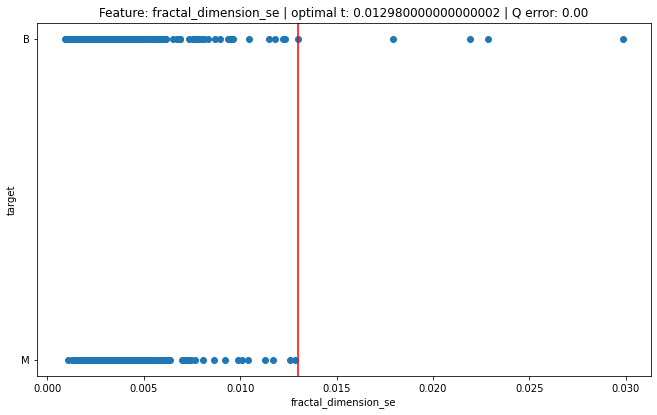

In [ ]:
plt.scatter(X[optimal_feature], y)
plt.axvline(x=optimal_t, color="red")
plt.xlabel(optimal_feature)
plt.ylabel('target')
plt.title('Feature: {} | optimal t: {} | Q error: {:.2f}'.format(optimal_feature, optimal_t, optimal_error))
plt.show()

## Решающее дерево: sklearn

In [ ]:
X_train = X_train.drop('diagnosis', axis=1)
y_train = y_train == 'B'
y_train = y_train.astype(int)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=3, random_state=13)
dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=13, splitter='best')

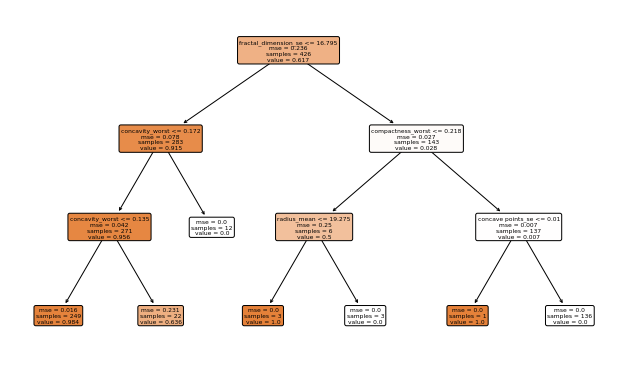

In [ ]:
from sklearn.tree import plot_tree
plot_tree(dt, feature_names=X.columns, filled=True, rounded=True)
plt.show()

In [ ]:
X_test = X_test.drop('diagnosis', axis=1)
y_test = y_test == 'B'
y_test = y_test.astype(int)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, dt.predict(X_test))

0.059741325199853534

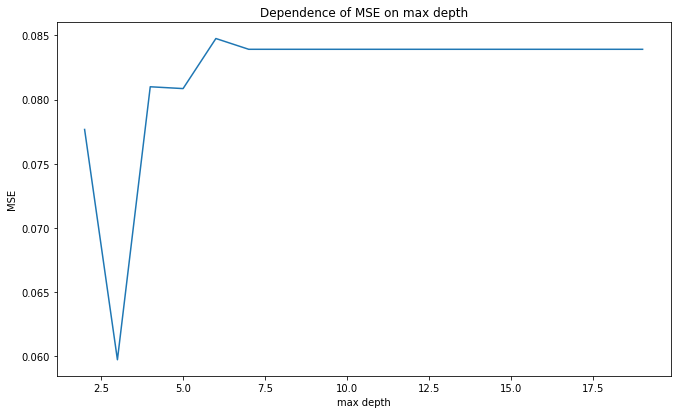

In [ ]:
max_depth_array = range(2, 20)
mse_array = []
for max_depth in max_depth_array:
    dt = DecisionTreeRegressor(max_depth=max_depth, random_state=13)
    dt.fit(X_train, y_train)
    mse_array.append(mean_squared_error(y_test, dt.predict(X_test)))
plt.plot(max_depth_array, mse_array)
plt.title('Dependence of MSE on max depth')
plt.xlabel('max depth')
plt.ylabel('MSE')
plt.show()

In [ ]:
pd.DataFrame({
    'max_depth': max_depth_array,
    'MSE': mse_array
}).sort_values(by='MSE').reset_index(drop=True)

,max_depth,MSE
0,3,0.059741
1,2,0.077674
2,5,0.080857
3,4,0.080998
4,17,0.083916
5,16,0.083916
6,15,0.083916
7,14,0.083916
8,13,0.083916
9,12,0.083916


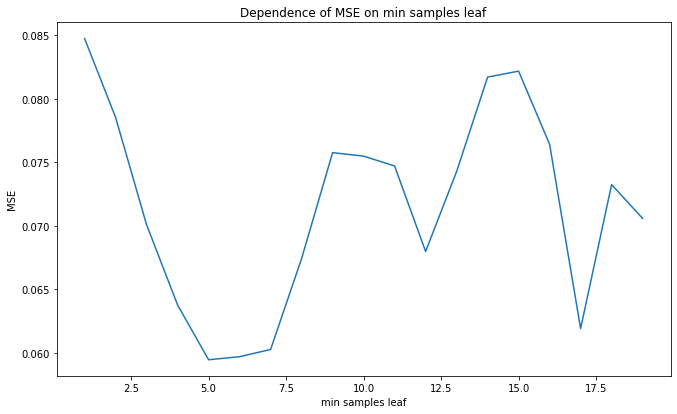

In [ ]:
min_samples_leaf_array = range(1, 20)
mse_array = []
for min_samples_leaf in min_samples_leaf_array:
    dt = DecisionTreeRegressor(max_depth=6, min_samples_leaf=min_samples_leaf, random_state=13)
    dt.fit(X_train, y_train)
    mse_array.append(mean_squared_error(y_test, dt.predict(X_test)))
plt.plot(min_samples_leaf_array, mse_array)
plt.title('Dependence of MSE on min samples leaf')
plt.xlabel('min samples leaf')
plt.ylabel('MSE')
plt.show()

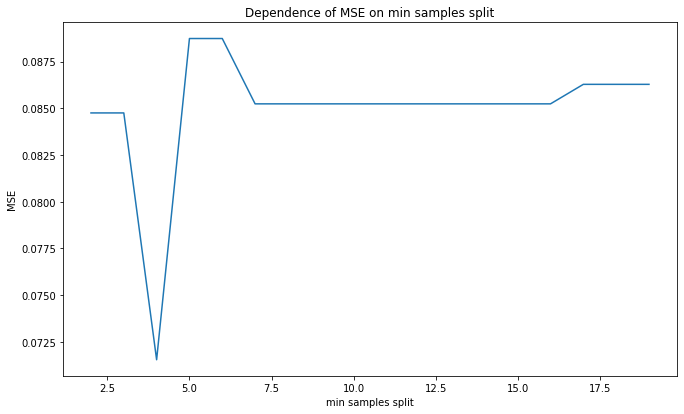

In [ ]:
min_samples_split_array = range(2, 20)
mse_array = []
for min_samples_split in min_samples_split_array:
    dt = DecisionTreeRegressor(max_depth=6, min_samples_split=min_samples_split, random_state=13)
    dt.fit(X_train, y_train)
    mse_array.append(mean_squared_error(y_test, dt.predict(X_test)))
plt.plot(min_samples_split_array, mse_array)
plt.title('Dependence of MSE on min samples split')
plt.xlabel('min samples split')
plt.ylabel('MSE')
plt.show()

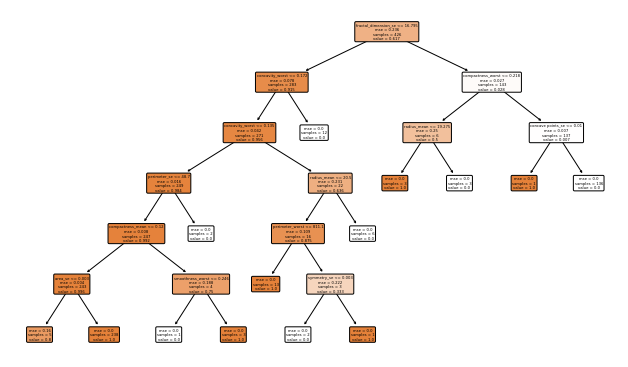

In [ ]:
dt = DecisionTreeRegressor(max_depth=6, random_state=13)
dt.fit(X_train, y_train)
plot_tree(dt, feature_names=X.columns, filled=True, rounded=True)
plt.show()

In [ ]:
mean_squared_error(y_test, dt.predict(X_test))

0.08475524475524476

In [ ]:
dt.feature_importances_

array([0.        , 0.04849082, 0.        , 0.        , 0.        ,
       0.        , 0.00238323, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01955233, 0.00196215,
       0.        , 0.        , 0.        , 0.00994377, 0.00667792,
       0.74904927, 0.        , 0.        , 0.01085162, 0.        ,
       0.00751266, 0.01397767, 0.12959855, 0.        , 0.        ])

In [ ]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
386,12.210,14.09,78.78,462.0,0.08108,0.07823,0.068390,0.02534,0.1646,0.06154,0.2666,0.8309,2.097,19.96,0.004405,0.03026,0.043440,0.010870,0.01921,0.004622,13.130,19.29,87.65,529.9,0.10260,0.24310,0.30760,0.09140,0.2677,0.08824
424,9.742,19.12,61.93,289.7,0.10750,0.08333,0.008934,0.01967,0.2538,0.07029,0.6965,1.7470,4.607,43.52,0.013070,0.01885,0.006021,0.010520,0.03100,0.004225,11.210,23.17,71.79,380.9,0.13980,0.13520,0.02085,0.04589,0.3196,0.08009
443,10.570,18.32,66.82,340.9,0.08142,0.04462,0.019930,0.01111,0.2372,0.05768,0.1818,2.5420,1.277,13.12,0.010720,0.01331,0.019930,0.011110,0.01717,0.004492,10.940,23.31,69.35,366.3,0.09794,0.06542,0.03986,0.02222,0.2699,0.06736
452,12.000,28.23,76.77,442.5,0.08437,0.06450,0.040550,0.01945,0.1615,0.06104,0.1912,1.7050,1.516,13.86,0.007334,0.02589,0.029410,0.009166,0.01745,0.004302,13.090,37.88,85.07,523.7,0.12080,0.18560,0.18110,0.07116,0.2447,0.08194
539,7.691,25.44,48.34,170.4,0.08668,0.11990,0.092520,0.01364,0.2037,0.07751,0.2196,1.4790,1.445,11.73,0.015470,0.06457,0.092520,0.013640,0.02105,0.007551,8.678,31.89,54.49,223.6,0.15960,0.30640,0.33930,0.05000,0.2790,0.10660


In [ ]:
# without scaling
for max_depth in [3, 6]:
    dt = DecisionTreeRegressor(max_depth=max_depth, random_state=13)
    dt.fit(X_train, y_train)
    print(mean_squared_error(y_test, dt.predict(X_test)))

0.059741325199853534
0.08475524475524476
